In [39]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "dataset-v2"

In [40]:
csv_list = []
json_list = []

for item in os.listdir(dataset_path):
    if item.endswith(".csv"):
        csv_list.append(item)
    else:
        json_list.append(item)

print(f'csv = {csv_list} \njson = {json_list}')

csv = ['test.csv', 'test_metadata.csv', 'train.csv', 'train_metadata.csv'] 
json = ['additional_data.json', 'test.json', 'train.json']


In [41]:
dataframes = [pd.read_csv(os.path.join(dataset_path, item)) for item in csv_list]

for pos, df in enumerate(dataframes):
    columns_str = ""
    for column in df.columns:
        columns_str += " " + column
    print(f"F{pos} -----------------------------++>")
    print(f"{len(df.columns)} Columns: {columns_str}")


F0 -----------------------------++>
17 Columns:  id text is_offensive is_targeted targeted_type toxic_spans health ideology insult lgbtqphobia other_lifestyle physical_aspects profanity_obscene racism religious_intolerance sexism xenophobia
F1 -----------------------------++>
13 Columns:  id source created_at collected_at toxicity_score category annotator_id gender year_of_birth education_level annotator_type age background
F2 -----------------------------++>
17 Columns:  id text is_offensive is_targeted targeted_type toxic_spans health ideology insult lgbtqphobia other_lifestyle physical_aspects profanity_obscene racism religious_intolerance sexism xenophobia
F3 -----------------------------++>
13 Columns:  id source created_at collected_at toxicity_score category annotator_id gender year_of_birth education_level annotator_type age background


In [42]:
df_metadata = dataframes[3]
df_metadata = df_metadata[df_metadata["source"] == "Twitter"]

df_metadata

df_twt = dataframes[2]
df_twt = df_twt[df_twt["id"].isin(df_metadata["id"])]

count_tags = df_twt['is_offensive'].value_counts()
count_tags


OFF    1711
NOT     100
Name: is_offensive, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

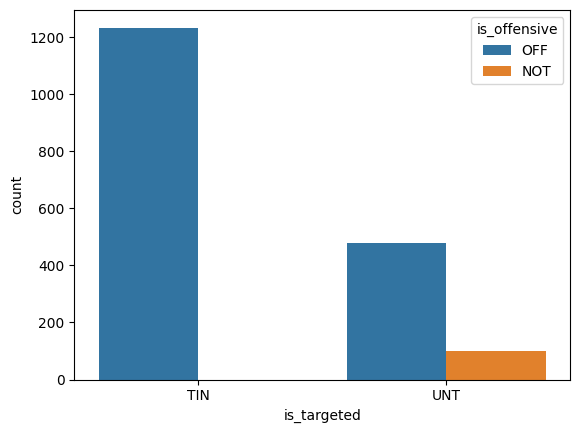

In [43]:
# Cria um gráfico de barras contando o número de textos ofensivos para cada valor de is_targeted
sns.countplot(data=df_twt, x='is_targeted', hue='is_offensive')
plt.show()


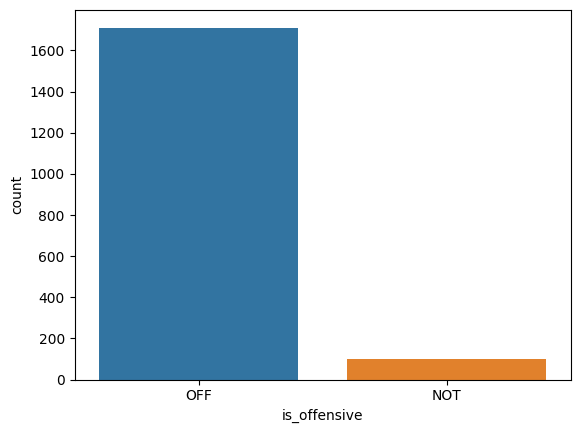

In [44]:
sns.countplot(data=df_twt, x='is_offensive')
plt.show()


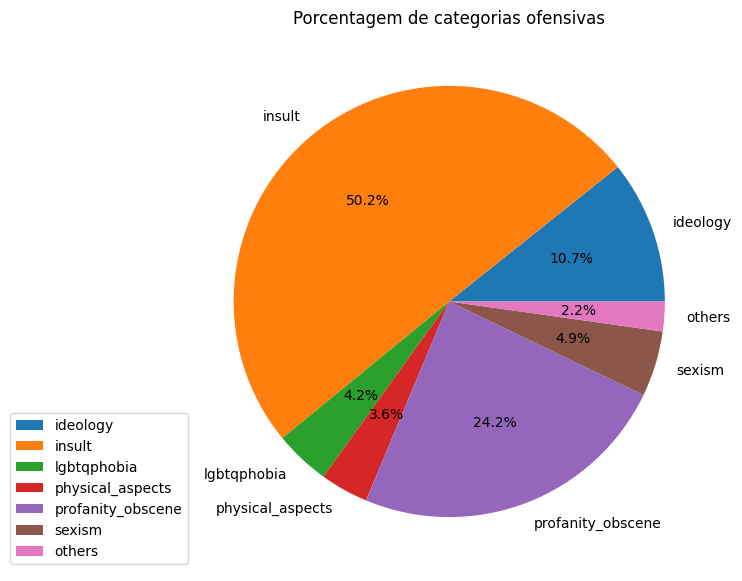

In [118]:
df_filtered = df_twt.loc[:, ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle', 'physical_aspects', 'profanity_obscene', 'racism', 'religious_intolerance', 'sexism', 'xenophobia']]

# calcular o número de valores True em cada coluna
counts = df_filtered.iloc[:, 1:].sum()

# identificar as colunas com menos de 1%
threshold = 30
low_counts = counts[counts < threshold]

counts.drop(index=low_counts.index, axis=1, inplace=True)

# somar os valores das colunas com menos de 1% e adicionar uma nova coluna ao DataFrame original
df_filtered['others'] = df_filtered[low_counts.index].sum(axis=1)

# atualizar o valor de counts com a nova coluna criada
counts['others'] = df_filtered['others'].sum()

# criar o gráfico de pizza com as novas informações
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Porcentagem de categorias ofensivas')
plt.legend(counts.index, loc="lower center", bbox_to_anchor=(-0.15,0))
plt.show()



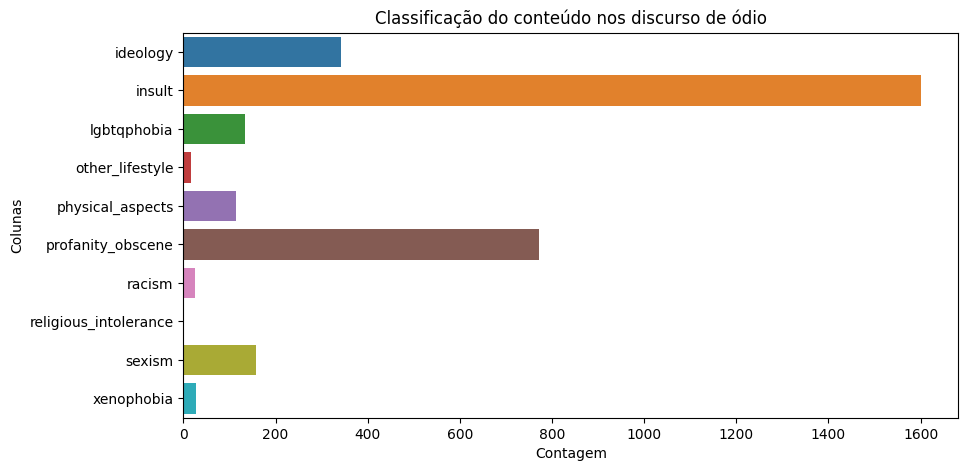

In [62]:
# Criar figura e eixo
fig, ax = plt.subplots(figsize=(10,5))

# Criar gráfico de barras
sns.barplot(x=counts.values, y=counts.index, ax=ax)

# Definir título e rótulos dos eixos
ax.set_title("Classificação do conteúdo nos discurso de ódio")
ax.set_ylabel("Colunas")
ax.set_xlabel("Contagem")

# Exibir gráfico
plt.show()
